In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import utils.stochastic_images as si
from utils.utils import normalize_outbound_to_float64
from utils.experiments_functions import get_img_info_simple


In [2]:
def plot_param_exploration(image_generator, param_name, param_values, fixed_params={}, title_prefix="", image_size=(128, 128)):
    fig, axes = plt.subplots(1, len(param_values), figsize=(3 * len(param_values), 3))
    if len(param_values) == 1:
        axes = [axes]

    for ax, val in zip(axes, param_values):
        params = fixed_params.copy()
        params[param_name] = val
        image = image_generator(image_size=image_size, **params)
        ax.imshow(image, cmap="viridis", origin="lower")
        ax.set_title(f"{param_name}={val}", fontsize=10)
        ax.axis("off")

    fig.suptitle(title_prefix, fontsize=14)
    plt.tight_layout()
    plt.show()

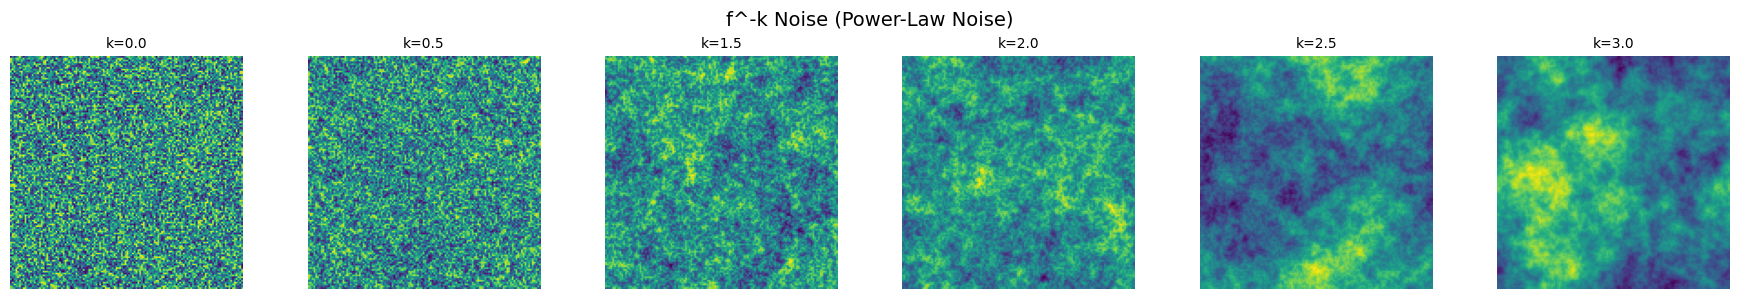

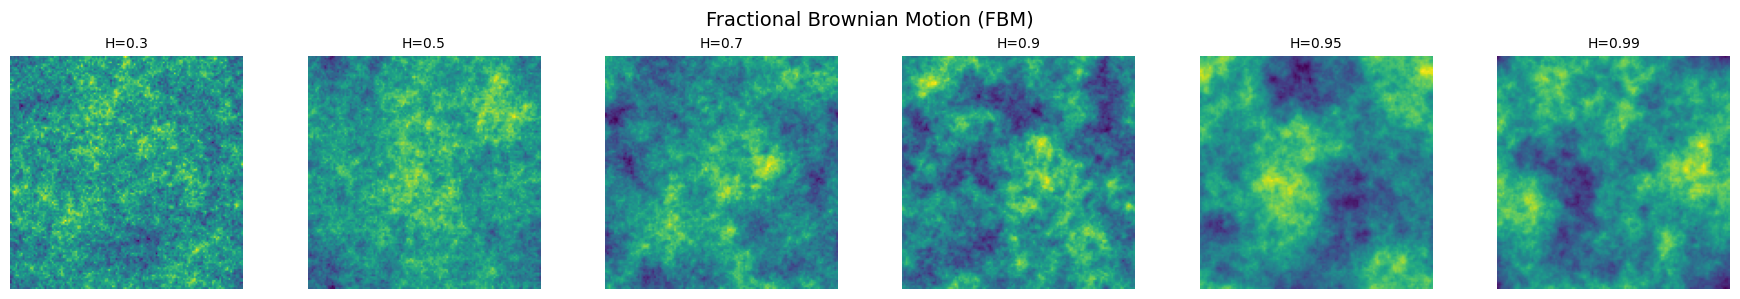

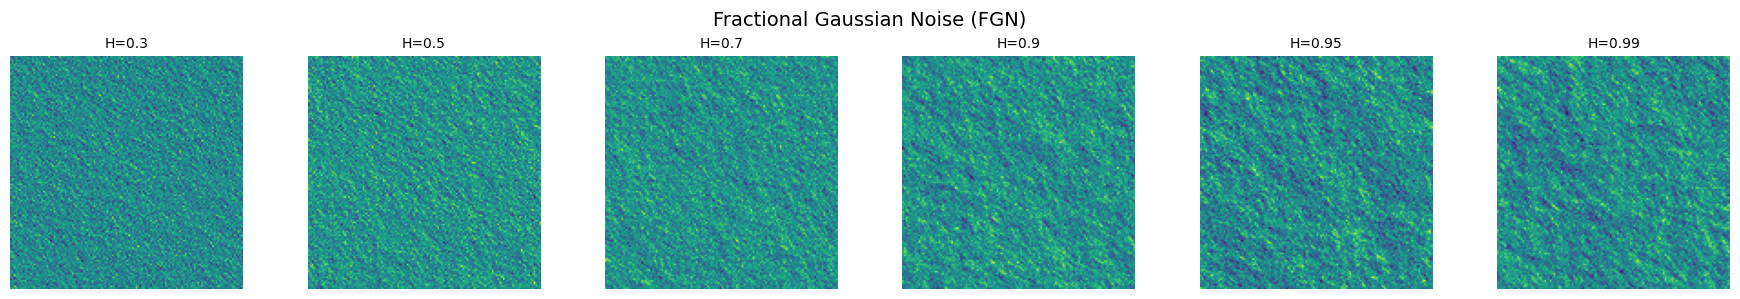

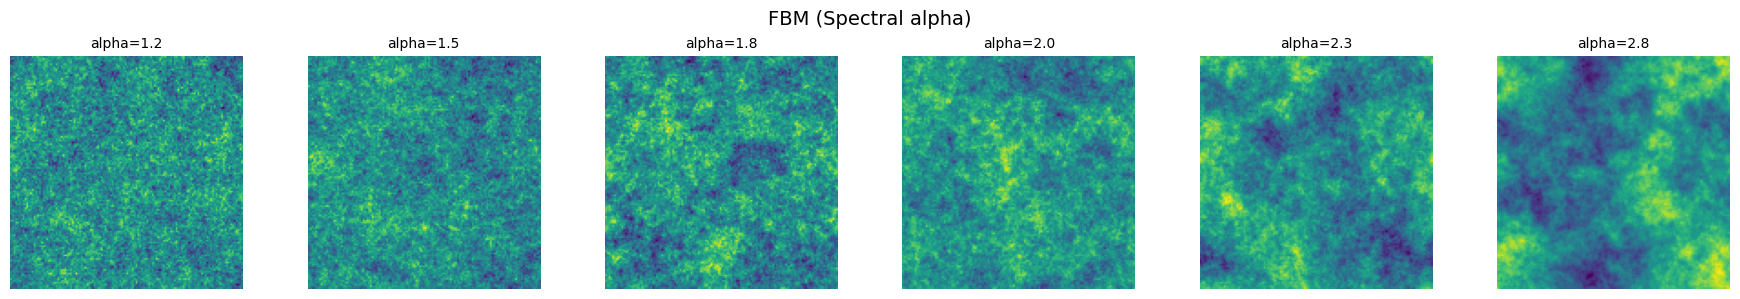

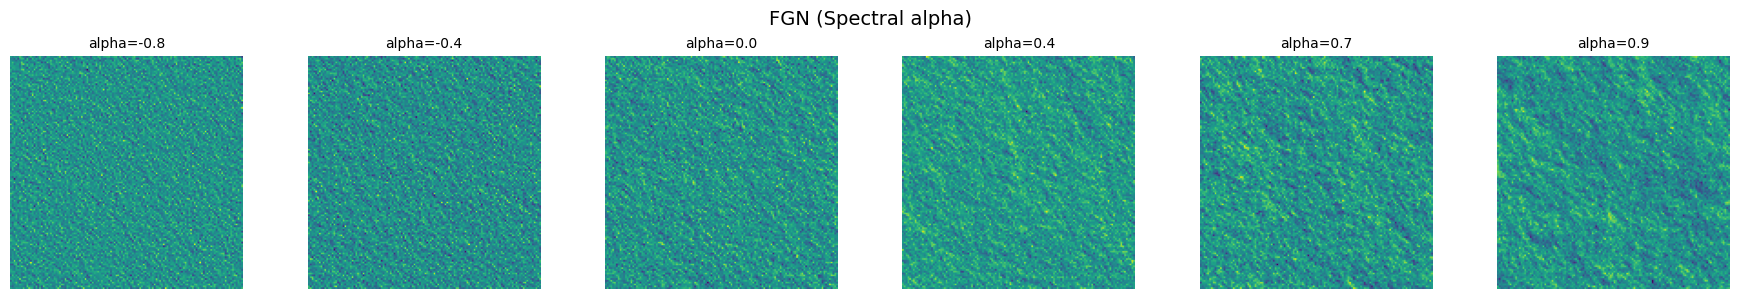

In [3]:
plot_param_exploration(si.fk_noise_texture, "k", [0.0, 0.5, 1.5, 2.0, 2.5, 3.0], {}, "f^-k Noise (Power-Law Noise)")
plot_param_exploration(si.fbm_texture, "H", [0.3, 0.5, 0.7, 0.9, 0.95, 0.99], {}, "Fractional Brownian Motion (FBM)")
plot_param_exploration(si.fgn_texture, "H", [0.3, 0.5, 0.7, 0.9, 0.95, 0.99], {}, "Fractional Gaussian Noise (FGN)")
plot_param_exploration(si.fbm_texture_alpha, "alpha", [1.2, 1.5, 1.8, 2.0, 2.3, 2.8], {}, "FBM (Spectral alpha)")
plot_param_exploration(si.fgn_texture_alpha, "alpha", [-0.8, -0.4, 0.0, 0.4, 0.7, 0.9], {}, "FGN (Spectral alpha)")



In [4]:
import pandas as pd

# Define the stochastic image configurations
configs = [
    ("knoise", si.fk_noise_texture, "k", [0.0, 0.5, 1.5, 2.0, 2.5, 3.0], {}),
    ("fbm", si.fbm_texture, "H", [0.3, 0.5, 0.7, 0.9, 0.95, 0.99], {}),
    ("fgn", si.fgn_texture, "H", [0.3, 0.5, 0.7, 0.9, 0.95, 0.99], {}),
    ("fbm_spectral", si.fbm_texture_alpha, "alpha", [1.2, 1.5, 1.8, 2.0, 2.3, 2.8], {}),
    ("fgn_spectral", si.fgn_texture_alpha, "alpha", [-0.8, -0.4, 0.0, 0.4, 0.7, 0.9], {})
]

image_data_list = []

# Loop and call image generator + descriptor for each parameter
for type_name, func, param_name, param_list, fixed_params in configs:
    for val in param_list:
        kwargs = fixed_params.copy()
        kwargs[param_name] = val
        image = func(**kwargs, image_size=(256, 256))

        # Example: image feature extraction function (replace with yours)
        info = get_img_info_simple(image, dx=6, dy=1)

        # Store metadata
        info["image_name"] = type_name
        info["param_name"] = param_name
        info["param_value"] = val
        image_data_list.append(info)

# Create a DataFrame with the data
image_data_df = pd.concat(image_data_list, ignore_index=True)
image_data_df


Smoothness  Curve structure   Entropy  Complexity  Shannon Entropy  \
0    -0.000615         0.003260  0.999137    0.002066         0.999137   
1     0.021315         0.028451  0.997085    0.006963         0.997085   
2     0.073849         0.077908  0.977344    0.051548         0.977344   
3     0.107082         0.114095  0.955442    0.096226         0.955442   
4     0.144221         0.151388  0.918970    0.159264         0.918970   
5     0.198170         0.191772  0.861147    0.234836         0.861147   
6     0.072511         0.105483  0.973215    0.060020         0.973215   
7     0.102130         0.137470  0.950931    0.103490         0.950931   
8     0.138255         0.162153  0.919583    0.155808         0.919583   
9     0.174441         0.193203  0.870858    0.219894         0.870858   
10    0.189158         0.201000  0.861469    0.232136         0.861469   
11    0.198062         0.201169  0.853531    0.239070         0.853531   
12   -0.034510        -0.065975  0.998179    0.004385         0.998179   
13   -0.020730        -0.042599  0.998621    0.003307         0.998621   
14   -0.003091        -0.009950  0.996003    0.009714         0.996003   
15    0.018316         0.014994  0.990508    0.022631         0.990508   
16    0.017209         0.026528  0.990446    0.022787         0.990446   
17    0.022468         0.029235  0.987503    0.029689         0.987503   
18    0.049642         0.080523  0.985496    0.033479         0.985496   
19    0.072603         0.102191  0.975740    0.054522         0.975740   
20    0.084752         0.122676  0.964590    0.077578         0.964590   
21    0.100715         0.137255  0.951435    0.102784         0.951435   
22    0.128858         0.156509  0.926801    0.144294         0.926801   
23    0.178608         0.195494  0.871512    0.220336         0.871512   
24   -0.044829        -0.094256  0.996295    0.009032         0.996295   
25   -0.032926        -0.071157  0.997945    0.004939         0.997945   
26   -0.017132        -0.040323  0.998371    0.003913         0.998371   
27   -0.006720        -0.016317  0.996719    0.007898         0.996719   
28    0.010350         0.010165  0.992997    0.016826         0.992997   
29    0.015809         0.017409  0.990558    0.022528         0.990558   

    Fisher-Shannon Complexity    image_name param_name  param_value  
0                    0.002778        knoise          k         0.00  
1                    0.006032        knoise          k         0.50  
2                    0.031084        knoise          k         1.50  
3                    0.051286        knoise          k         2.00  
4                    0.082890        knoise          k         2.50  
5                    0.124552        knoise          k         3.00  
6                    0.026315           fbm          H         0.30  
7                    0.045180           fbm          H         0.50  
8                    0.070041           fbm          H         0.70  
9                    0.106395           fbm          H         0.90  
10                   0.115312           fbm          H         0.95  
11                   0.119665           fbm          H         0.99  
12                   0.003786           fgn          H         0.30  
13                   0.003436           fgn          H         0.50  
14                   0.006240           fgn          H         0.70  
15                   0.011400           fgn          H         0.90  
16                   0.010418           fgn          H         0.95  
17                   0.014610           fgn          H         0.99  
18                   0.014863  fbm_spectral      alpha         1.20  
19                   0.022687  fbm_spectral      alpha         1.50  
20                   0.033169  fbm_spectral      alpha         1.80  
21                   0.044843  fbm_spectral      alpha         2.00  
22                   0.066586  fbm_spectral      alpha         2.30  
23                   0.111511

c:\Users\Alvaro\Documents\1 - MESTRADO\Estudo dirigido\SCS_plane_study\utils\utils.py:61: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df_cont = pd.read_csv(folder_path +'continua-N'+str(N)+'.q1', skiprows=20, sep = '  ')
c:\Users\Alvaro\Documents\1 - MESTRADO\Estudo dirigido\SCS_plane_study\utils\utils.py:64: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df_troz = pd.read_csv(folder_path +'trozos-N'+str(N)+'.q1', skiprows=20, sep = '  ')
c:\Users\Alvaro\Documents\1 - MESTRADO\Estudo dirigido\SCS_plane_study\utils\utils.py:61: ParserWarning: Falling back to the 'python' engine because the 'c' engine do

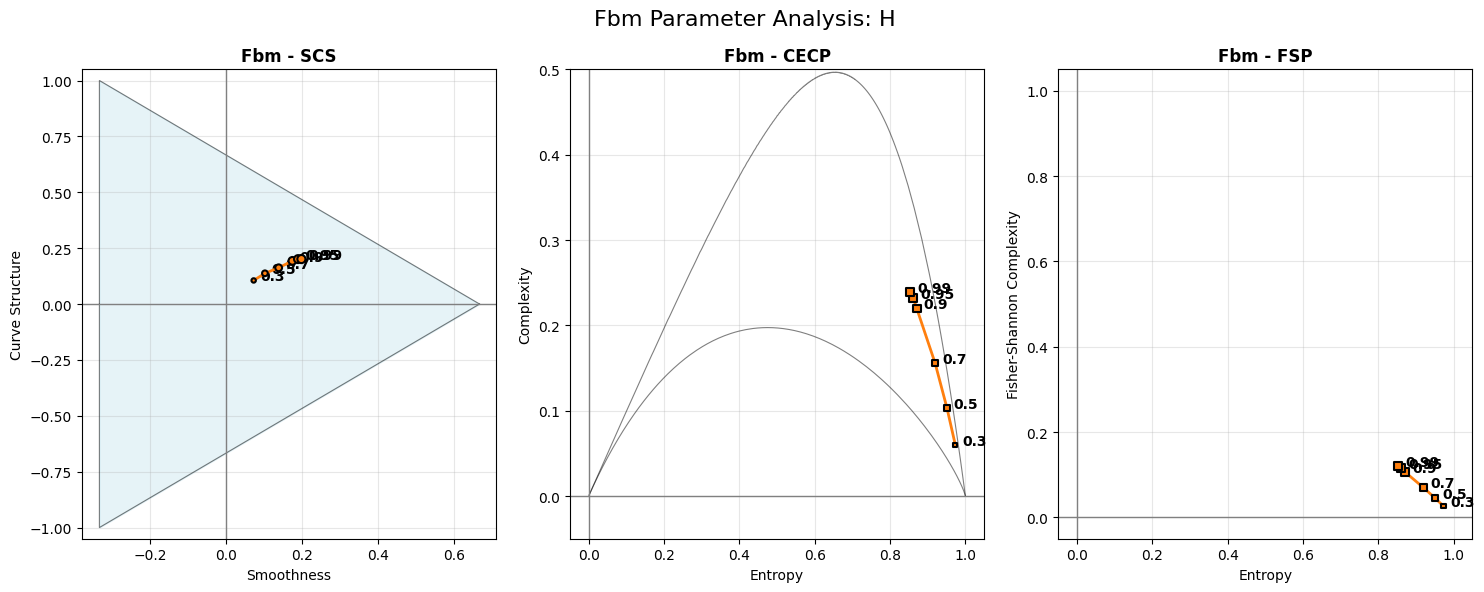

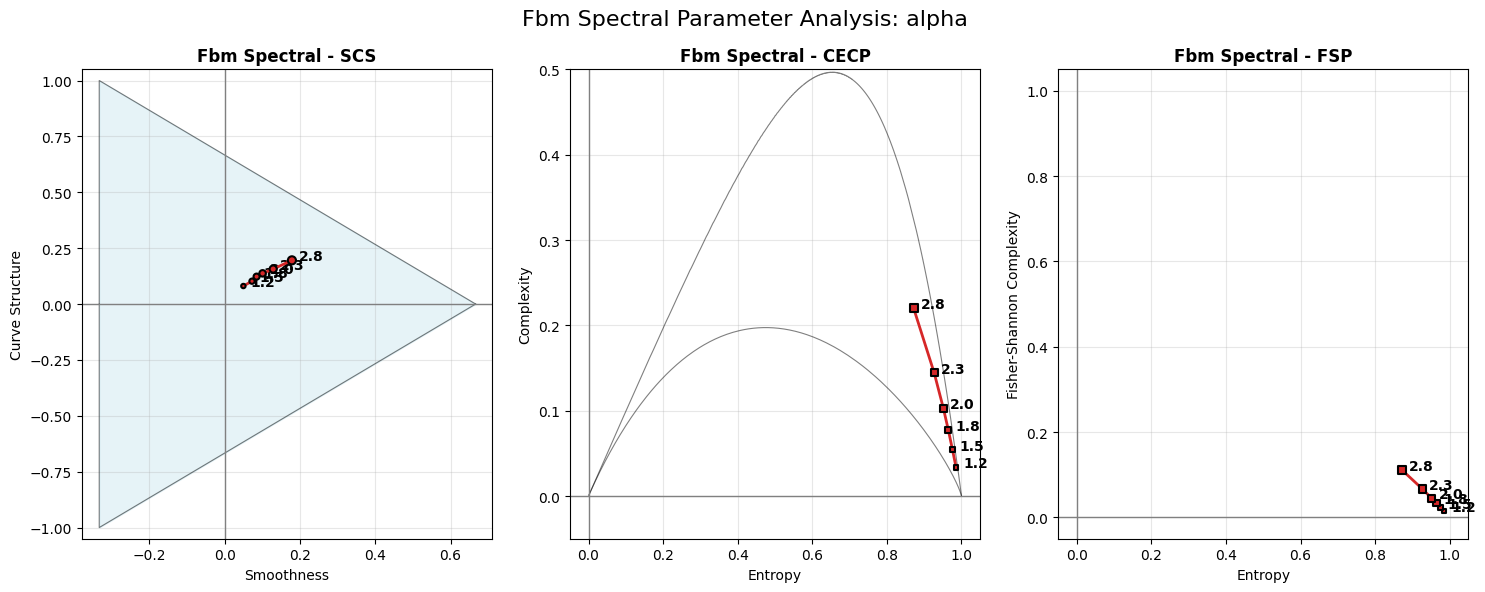

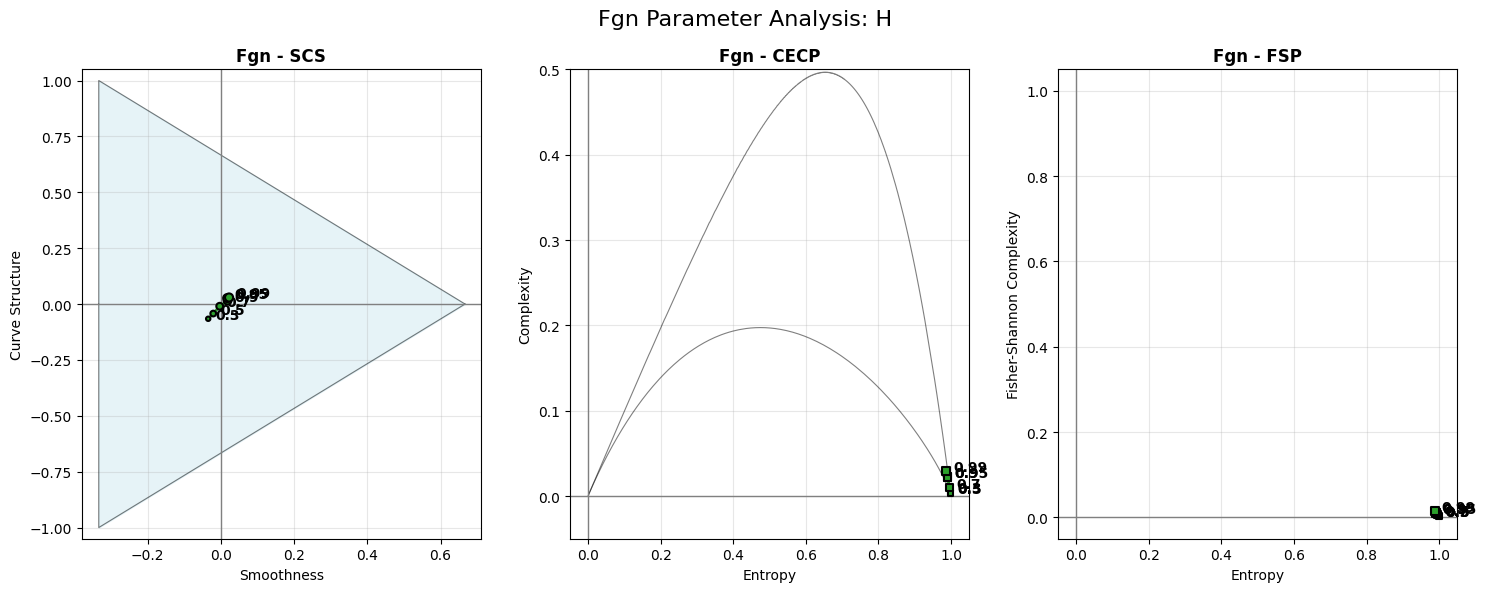

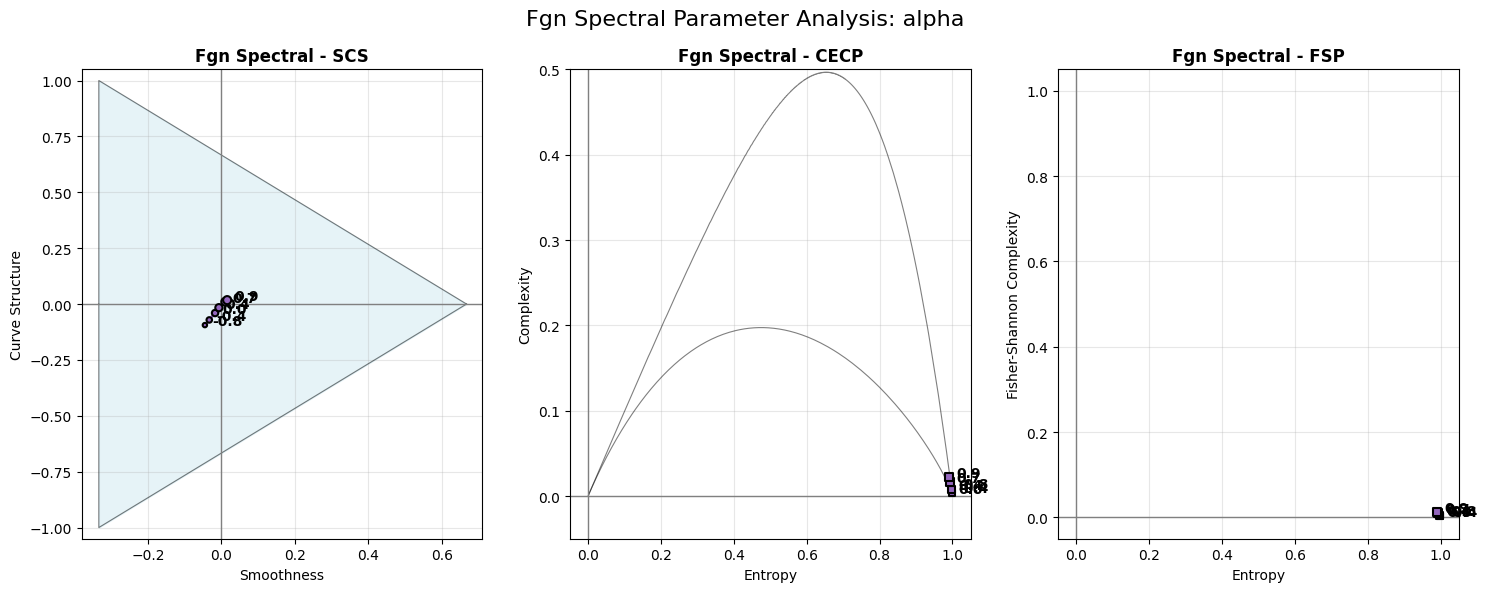

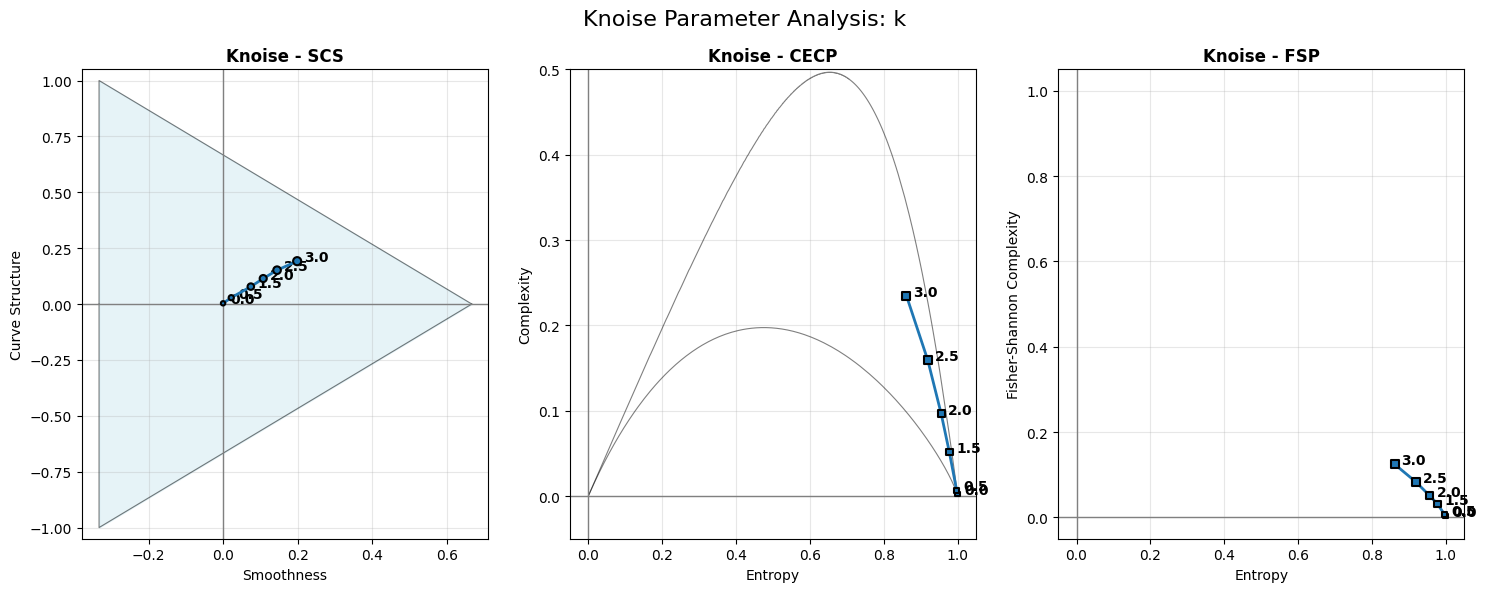

In [5]:
from utils.utils import read_entropy_complexity_limits

import matplotlib.pyplot as plt
import numpy as np

# Load CECP limits for the complexity-entropy plot
df_cont, df_troz = read_entropy_complexity_limits('data/limits/mv/', N=240)
df_cont, df_troz = read_entropy_complexity_limits('data/limits/unv/', N=720)

# Load SCSP limits for the smoothness-curve structure plot
df_scs = pd.read_csv('data/limits/SCSP/SCS_limits_steps1000.csv')

# Define colors for each image type
image_colors = {
    'knoise': '#1f77b4',        # blue
    'fbm': '#ff7f0e',           # orange
    'fgn': '#2ca02c',           # green
    'fbm_spectral': '#d62728',  # red
    'fgn_spectral': '#9467bd',  # purple
}

# Define consistent limits for all plots
scs_limits = (-0.3, 0.7, -0.4, 0.7)         # xlim_min, xlim_max, ylim_min, ylim_max
cecp_limits = (0.2, 1.05, 0, 0.4)           # xlim_min, xlim_max, ylim_min, ylim_max
fsp_limits = (-0.05, 1.05, -0.05, 1.05)     # xlim_min, xlim_max, ylim_min, ylim_max

# Create a separate figure for each image type
for image_name, group in image_data_df.groupby('image_name'):
    fig, (ax_scs, ax_cecp, ax_fsp) = plt.subplots(1, 3, figsize=(15, 6))
    
    # Sort data by parameter value
    group = group.sort_values('param_value')
    color = image_colors[image_name]
    
    # Format the label
    label = image_name.replace('_', ' ').title()
    if image_name == 'arnold':
        label = "Arnold's Cat Map"
    
    # Calculate marker sizes based on parameter values
    # Scale from 5 to 15 based on min and max parameter values
    param_min = group['param_value'].min()
    param_max = group['param_value'].max()
    marker_sizes = 5 + 12 * (group['param_value'] - param_min) / (param_max - param_min)
    
    # SCS plot with variable marker sizes
    ax_scs.scatter(group['Smoothness'], group['Curve structure'], 
               color=color, s=marker_sizes*2, marker='o', linewidth=1.5, 
               edgecolor='black', zorder=10)
    ax_scs.plot(group['Smoothness'], group['Curve structure'], 
               color=color, linestyle='-', linewidth=2, zorder=5)
    
    # CECP plot with variable marker sizes
    ax_cecp.scatter(group['Entropy'], group['Complexity'], 
                color=color, s=marker_sizes*2, marker='s', linewidth=1.5, 
                edgecolor='black', zorder=10)
    ax_cecp.plot(group['Entropy'], group['Complexity'], 
                color=color, linestyle='-', linewidth=2, zorder=5)
    
    # FSP plot with variable marker sizes: 'Shannon Entropy' X 'Fisher-Shannon Complexity'
    ax_fsp.scatter(group['Shannon Entropy'], group['Fisher-Shannon Complexity'], 
                color=color, s=marker_sizes*2, marker='s', linewidth=1.5, 
                edgecolor='black', zorder=10)
    ax_fsp.plot(group['Shannon Entropy'], group['Fisher-Shannon Complexity'], 
                color=color, linestyle='-', linewidth=2, zorder=5)
    
    # Add CECP limits to the CECP plot
    ax_cecp.plot(df_cont['HT'], df_cont['CJT'], color='black', linewidth=0.8, alpha=0.5)
    ax_cecp.plot(df_troz['HT'], df_troz['CJT'], color='black', linewidth=0.8, alpha=0.5)
    # ax_scs.fill_between(df_cont['HT'], df_cont['CJT'],  df_troz['CJT'], color='lightblue', alpha=0.3, 
                # label='Valid Region')
    
    # Add SCS limits to the SCS plot
    ax_scs.plot(df_scs['Smoothness'], df_scs['Curve_Structure_Superior'], color='black', linewidth=0.8, alpha=0.5)
    ax_scs.plot(df_scs['Smoothness'], df_scs['Curve_Structure_Inferior'], color='black', linewidth=0.8, alpha=0.5)
    ax_scs.fill_between(df_scs['Smoothness'], df_scs['Curve_Structure_Inferior'], df_scs['Curve_Structure_Superior'], color='lightblue', alpha=0.3)
    
    
    # Add parameter values as annotations
    for _, row in group.iterrows():
        param_value = str(row['param_value'])
        
        # SCS point annotation
        ax_scs.annotate(f"{param_value}", 
                   xy=(row['Smoothness'], row['Curve structure']),
                   xytext=(5, 0), textcoords='offset points', 
                   fontsize=10, color='black', fontweight='bold')
        
        # CECP point annotation
        ax_cecp.annotate(f"{param_value}", 
                        xy=(row['Entropy'], row['Complexity']),
                        xytext=(5, 0), textcoords='offset points', 
                        fontsize=10, color='black', fontweight='bold')
        
        # CECP point annotation
        ax_fsp.annotate(f"{param_value}", 
                        xy=(row['Shannon Entropy'], row['Fisher-Shannon Complexity']),
                        xytext=(5, 0), textcoords='offset points', 
                        fontsize=10, color='black', fontweight='bold')
    
    # Set axis labels and limits
    ax_scs.set_title(f"{label} - SCS", fontweight='bold')
    ax_scs.set_xlabel('Smoothness')
    ax_scs.set_ylabel('Curve Structure')
    ax_scs.set_xlim(-0.38, 0.71)
    ax_scs.set_ylim(-1.05, 1.05)
    
    ax_cecp.set_title(f"{label} - CECP", fontweight='bold')
    ax_cecp.set_xlabel('Entropy')
    ax_cecp.set_ylabel('Complexity')
    ax_cecp.set_xlim(-0.05, 1.05)
    ax_cecp.set_ylim(-0.05, 0.5)
    
    ax_fsp.set_title(f"{label} - FSP", fontweight='bold')
    ax_fsp.set_xlabel('Entropy')
    ax_fsp.set_ylabel('Fisher-Shannon Complexity')
    ax_fsp.set_xlim(-0.05, 1.05)
    ax_fsp.set_ylim(-0.05, 1.05)
    
    # Add grid and reference lines
    ax_scs.grid(True, alpha=0.3)
    ax_scs.axhline(y=0, lw=1, color='gray')
    ax_scs.axvline(x=0, lw=1, color='gray')
    ax_cecp.grid(True, alpha=0.3)
    ax_cecp.axhline(y=0, lw=1, color='gray')
    ax_cecp.axvline(x=0, lw=1, color='gray')
    ax_fsp.grid(True, alpha=0.3)
    ax_fsp.axhline(y=0, lw=1, color='gray')
    ax_fsp.axvline(x=0, lw=1, color='gray')
    
    # Add parameter name info
    param_name = group['param_name'].iloc[0]
    fig.suptitle(f"{label} Parameter Analysis: {param_name}", fontsize=16)
    
    plt.tight_layout()
    # plt.savefig(f'results/{image_name}_parameter_analysis.png', bbox_inches='tight', dpi=300)
    plt.show()
